### use data from [Catent-Gaudin(2020)](https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A%2BA/640/A1)

In [36]:
from astropy.io.votable import parse_single_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.style.use('../shao.mplstyle')

In [26]:
path_table1 = '/Volumes/Vega/data_cluster/Cantat-Gaudin_2020/table1.vot' # 星团表格
path_nodup = '/Volumes/Vega/data_cluster/Cantat-Gaudin_2020/nodup.vot' # 成员星表格

In [27]:
# 读取VOTable文件
t1 = parse_single_table(path_table1)
t2 = parse_single_table(path_nodup)
# 将Table对象转换为pandas DataFrame格式
table1 = t1.to_table().to_pandas()
nodup = t2.to_table().to_pandas()

#### condition 1 : ( AgeNN >= 8 ) & ( DistPc <= 500 )

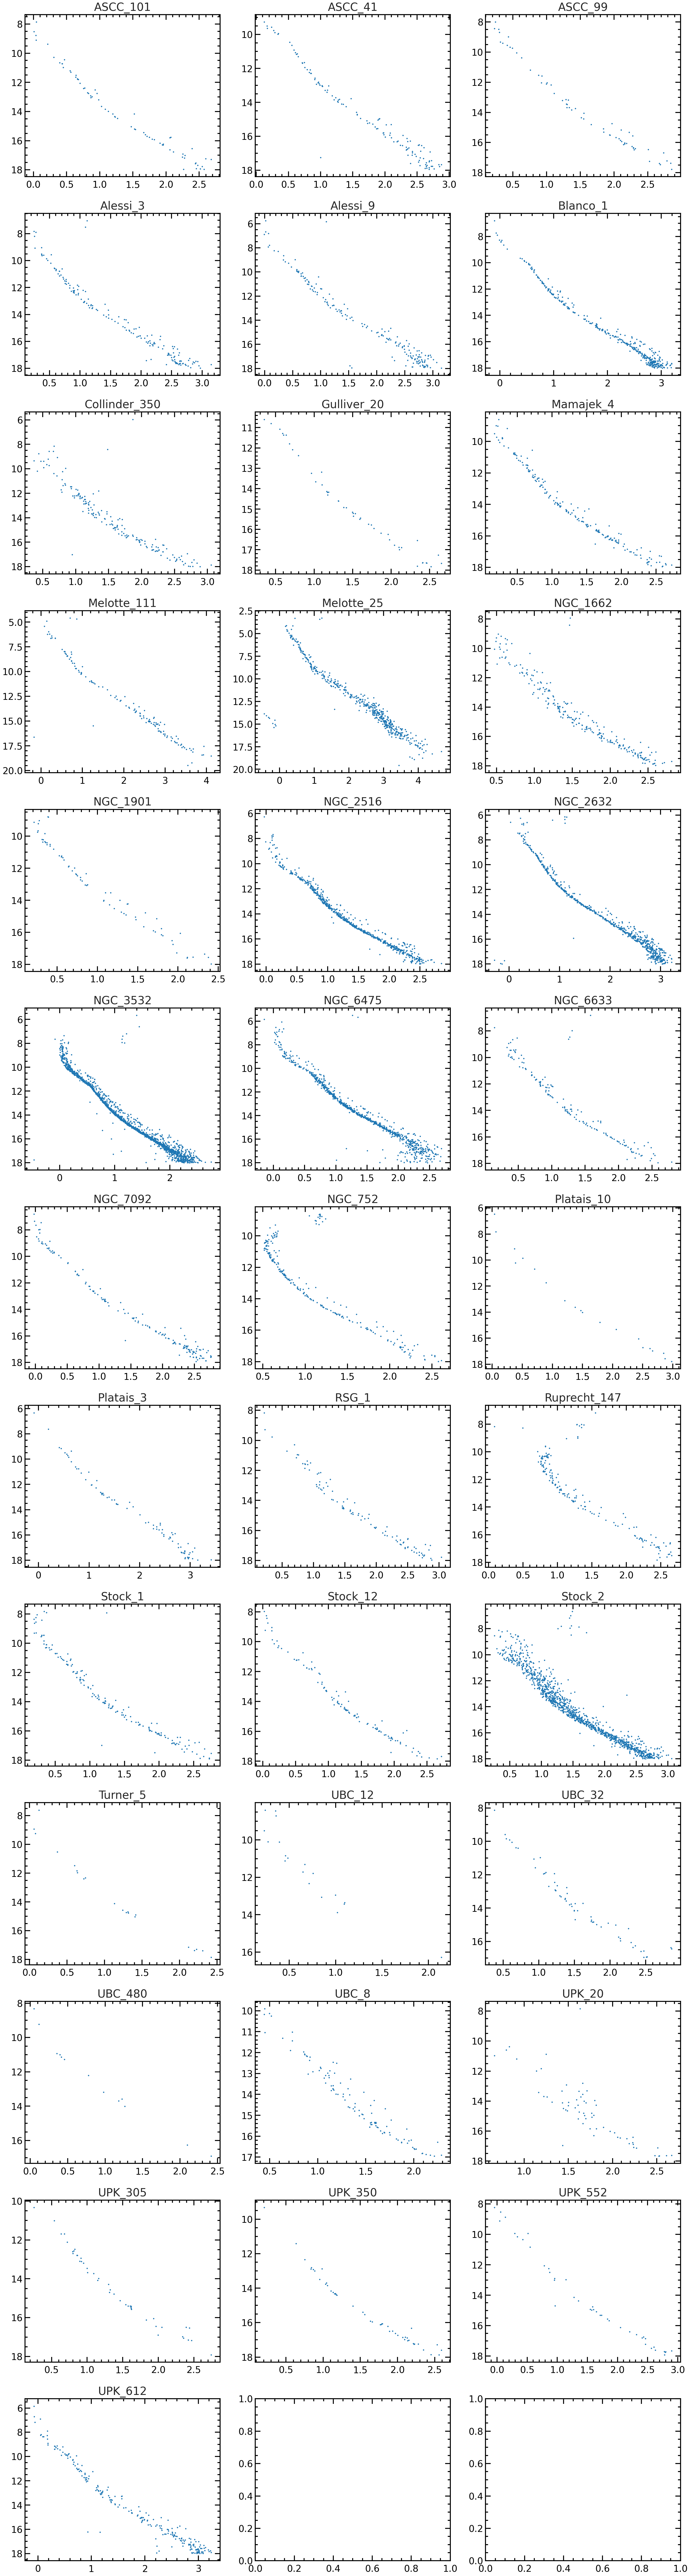

In [61]:
t = table1[(table1['AgeNN'] >=8) & (table1['DistPc'] <=500)]
cluster_list = t['Cluster']

# 设置子图布局
ncols=3
nrows = int(len(cluster_list) / ncols + len(cluster_list) % ncols)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 55),dpi=200)

for i,cluster in enumerate(cluster_list):
    c = nodup[nodup['Cluster']==cluster]
    G = c['Gmag']
    BP_RP = c['BP-RP']
    # 计算子图索引
    row_index = i // 3
    col_index = i % 3
    # 在对应的子图中绘制图形
    axs[row_index, col_index].scatter(BP_RP,G,s=1)
    axs[row_index, col_index].set_title(cluster)
    axs[row_index, col_index].invert_yaxis()
# 调整子图布局和间距
fig.tight_layout(pad=1.0)

# 保存为PDF文件
plt.savefig('./figure/condition1.pdf')

#### condition 2 : ( AgeNN <= 8 ) & ( DistPc <= 500 ) & ( Number >= 50 )

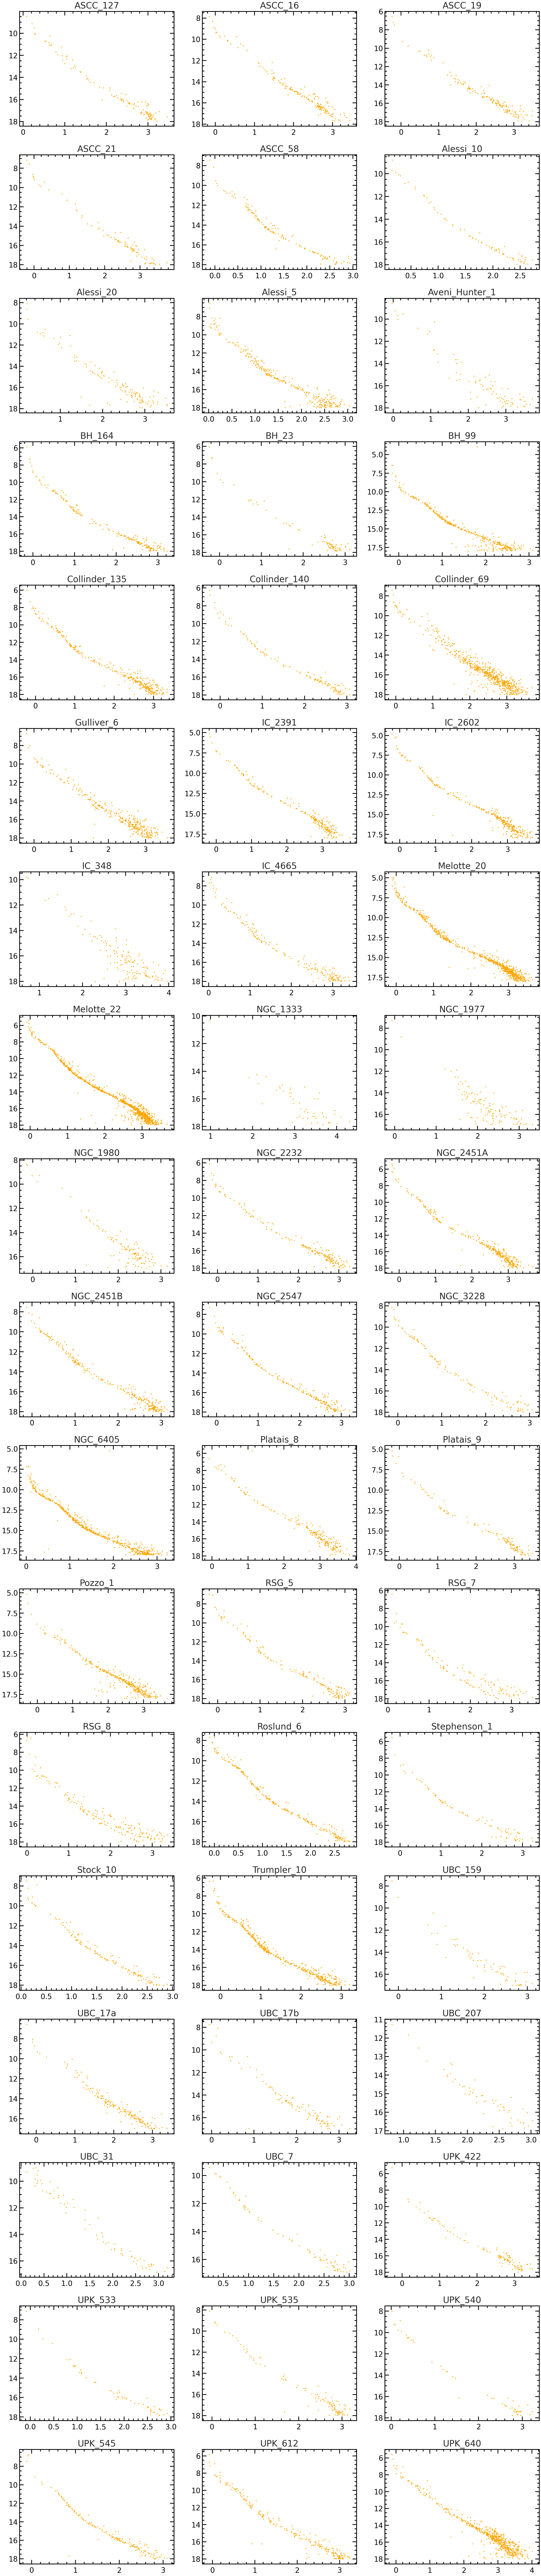

In [73]:
t = table1[(table1['AgeNN'] <=8) & (table1['DistPc'] <=500) & (table1['nbstars07'] >= 50)]
cluster_list = t['Cluster']

# 设置子图布局
ncols = 3
nrows = int(len(cluster_list) / ncols + len(cluster_list) % ncols)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 70),dpi=200)

for i,cluster in enumerate(cluster_list):
    c = nodup[nodup['Cluster']==cluster]
    G = c['Gmag']
    BP_RP = c['BP-RP']
    # 计算子图索引
    row_index = i // 3
    col_index = i % 3
    # 在对应的子图中绘制图形
    axs[row_index, col_index].scatter(BP_RP,G,s=1,color='orange')
    axs[row_index, col_index].set_title(cluster)
    axs[row_index, col_index].invert_yaxis()
# 调整子图布局和间距
fig.tight_layout(pad=1.0)

# 保存为PDF文件
plt.savefig('./figure/condition2.pdf')

In [75]:
table1[table1['Cluster']=='Melotte_22']

,Cluster,RA_ICRS,DE_ICRS,r50,nbstars07,pmRA_,pmDE,plx,Flag,AgeNN,AVNN,DMNN,DistPc,X,Y,Z,Rgc,SimbadName,_RA.icrs,_DE.icrs
736,Melotte_22,56.601002,24.114,1.274,952,20.077,-45.502998,7.346,NN,7.89,0.18,5.55,128.0,-114.0,27.0,-51.0,8454.0,Cl Melotte 22,56.6009,24.1142
